In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from sklearn import datasets
import seaborn as sns


In [2]:
sns.violinplot

<function seaborn.categorical.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)>

In [3]:
help(plt.violinplot)

Help on function violinplot in module matplotlib.pyplot:

violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None)
    Make a violin plot.
    
    Make a violin plot for each column of *dataset* or each vector in
    sequence *dataset*.  Each filled area extends to represent the
    entire data range, with optional lines at the mean, the median,
    the minimum, and the maximum.
    
    Parameters
    ----------
    dataset : Array or a sequence of vectors.
      The input data.
    
    positions : array-like, default = [1, 2, ..., n]
      Sets the positions of the violins. The ticks and limits are
      automatically set to match the positions.
    
    vert : bool, default = True.
      If true, creates a vertical violin plot.
      Otherwise, creates a horizontal violin plot.
    
    widths : array-like, default = 0.5
      Either a scalar or a vector that sets the maximal width of

In [2]:
data=pd.read_csv("Datasets/iris_4variables.csv")

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f46a2356828>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f46a2888a90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f46a2356e80>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f46a2356a20>}

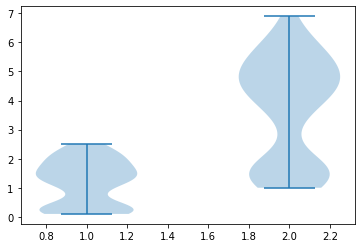

In [26]:
fig, ax = plt.subplots()
ax.violinplot([data["D"],data.C])

In [28]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the sa

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.to_csv("Datasets/tips.csv",sep=",")

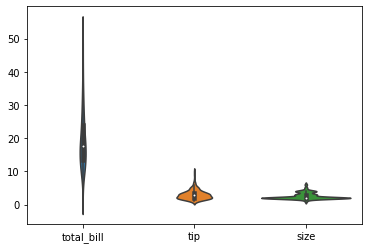

In [25]:
sns.violinplot(x=None,y=None,data=tips,order=None,hue_order=None,bw=None)

In [3]:
import inspect
sns.violinplot
args=inspect.getfullargspec(sns.violinplot)[0]
defaults=inspect.getfullargspec(sns.violinplot)[3]

In [5]:
inspect.getfullargspec(sns.violinplot)

FullArgSpec(args=['x', 'y', 'hue', 'data', 'order', 'hue_order', 'bw', 'cut', 'scale', 'scale_hue', 'gridsize', 'width', 'inner', 'split', 'dodge', 'orient', 'linewidth', 'color', 'palette', 'saturation', 'ax'], varargs=None, varkw='kwargs', defaults=(None, None, None, None, None, None, 'scott', 2, 'area', True, 100, 0.8, 'box', False, True, None, None, None, None, 0.75, None), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [67]:
parseBool("True")

NameError: name 'parseBool' is not defined

In [6]:
for arg,default in zip(args,defaults):
    print(arg,default)

x None
y None
hue None
data None
order None
hue_order None
bw scott
cut 2
scale area
scale_hue True
gridsize 100
width 0.8
inner box
split False
dodge True
orient None
linewidth None
color None
palette None
saturation 0.75
ax None


No handles with labels found to put in legend.


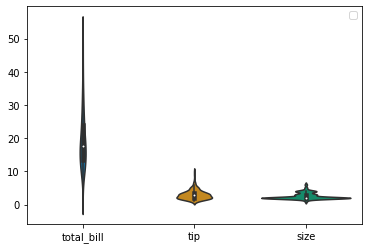

In [9]:
ax=sns.violinplot(data=tips,linewidth=None,palette="colorblind")
ax.legend()

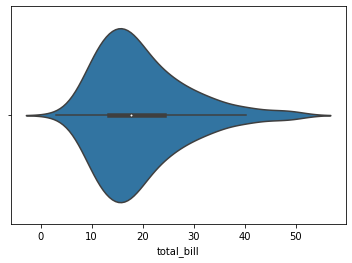

In [12]:
sns.violinplot(x="total_bill",hue="smoker",data=tips)

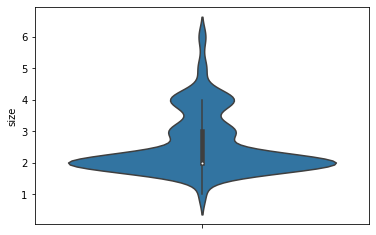

In [11]:
sns.violinplot(x="size",hue="time",data=tips, orient="v",color_palette="pastel")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [93]:
tips.size.dtype == "int"

True

In [4]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(tips.size)

True

In [15]:
any(tips.apply(is_numeric_dtype))

False

In [48]:
vals=["total_bill","smoker"]
not any(tips[vals].apply(is_numeric_dtype))

False

In [7]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

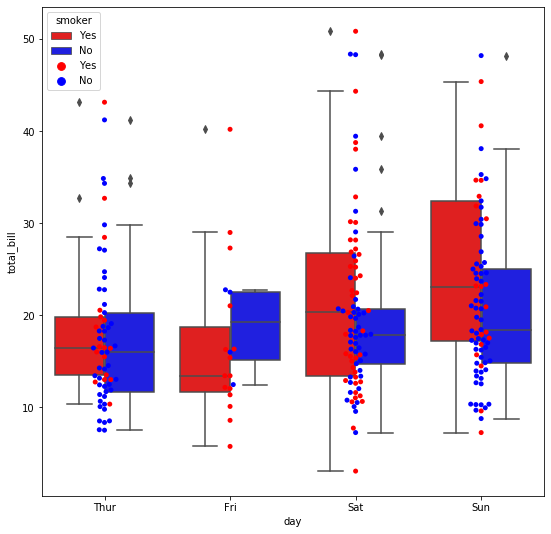

In [6]:
fig, axes = plt.subplots(figsize=(9,9))
palette=dict()
palette["Yes"]="red"
palette["No"]="blue"
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette=palette)
sns.swarmplot(x="day",y="total_bill",hue="smoker",data=tips,palette=palette)

No handles with labels found to put in legend.


Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Legend(parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None)
 |  
 |  Place a legend on the axes at location loc.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, han

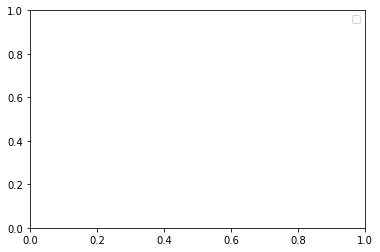

In [8]:
help(plt.legend())

In [35]:
tips_json=tips.to_json()

In [36]:
tips=pd.read_json(tips_json)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [52]:
vals=["smoker","tip","day"]
is_numeric_dtype(tips[vals])

False

In [54]:
tips[vals].dtypes.apply(is_numeric_dtype)

smoker    False
tip        True
day       False
dtype: bool

In [9]:
ela=[1,2,3,4]
ela=ela+[None]

In [10]:
ela.remove(None)

In [11]:
ela

[1, 2, 3, 4]

In [14]:
ela[0:2]

[1, 2]